In [32]:
import os
import numpy as np
from graph_tool import Graph, GraphView
from graph_tool.draw import graph_draw

In [1]:
import numpy as np


def normalize(rgb):
    return tuple(np.array(rgb) / 255) + (1.0, )

COLOR_RED = normalize([178, 34, 34])
COLOR_BLUE = normalize([31, 120, 180])
COLOR_GREY = normalize([220, 220, 220])
COLOR_BLACK = normalize([37, 37, 37])
COLOR_YELLOW = normalize([255, 217, 47])
COLOR_WHITE = normalize([255, 255, 255])
COLOR_ORANGE = normalize([252, 120, 88])
COLOR_PINK = normalize([255, 20, 147])
COLOR_GREEN = normalize([50, 205, 50])


def default_setting(g):
    vertex_text = g.new_vertex_property('string')
    for i in range(g.num_vertices()):
        vertex_text[i] = str(i)

    vertex_fill_color = g.new_vertex_property('vector<float>')
    vertex_fill_color.set_value(COLOR_RED)

    edge_color = g.new_edge_property('vector<float>')
    edge_color.set_value(COLOR_GREY)

    edge_text = g.new_edge_property('string')
    edge_text.set_value('')

    eorder = g.new_edge_property('int')
    eorder.set_value(0)

    return {'vertex_text': vertex_text,
            'vertex_fill_color': vertex_fill_color,
            'vertex_font_size': 32,
            'vertex_size': 64,
            'eorder': eorder,
            'edge_text': edge_text,
            'edge_color': edge_color,
            'edge_font_size': 64,
            'edge_text_distance': 8}


In [ ]:
"""
        4   8  
      /   /
    1 - 5 - 9
  /   \----\
0 - 2   6   10
  \   / 
    3 - 7 - 11

"""

In [4]:
g = Graph(directed=False)
g.add_vertex(12)
g.add_edge_list([
    (0, 1), (0, 2), (0, 3),
    (1, 4), (1, 5), (1, 10),
    (3, 6), (3, 7), (7, 11),
    (5, 8), (5, 9)
])

In [26]:
active_edges = [(0, 1), (0, 3), (1, 4), (1, 5), (3, 6), (3, 7), (5, 9)]

In [7]:
pos_data = [(0, -1), (1, -2), (1, -1), (1, 0), (2, -3), (2, -2), (2, -1), (2, 0), (3, -3), (3, -2), (3, -1), (3, 0)]
pos = g.new_vertex_property('vector<float>')
for i, xy in enumerate(pos_data):
    pos[i] = xy

In [41]:
infected = [0, 1, 3, 4, 5, 6, 7, 9, 10]
time = [0, 1, 1, 2, 2, 2, 2, 3, 3]

In [30]:
fig_dirname = 'figs/intro'

if not os.path.exists(fig_dirname):
    os.makedirs(fig_dirname)

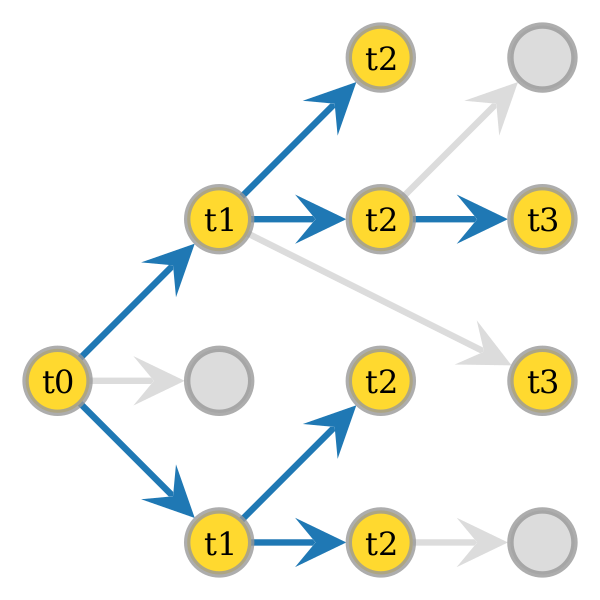

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe064a78d68, at 0x7fe0650460b8>

In [42]:
dg = GraphView(g, directed=True)
s = default_setting(dg)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i, t in zip(infected, time):
    s['vertex_text'][i] = 't{}'.format(t)
    s['vertex_fill_color'][i] = COLOR_YELLOW
for u, v in active_edges:
    s['edge_color'][dg.edge(u, v)] = COLOR_BLUE
graph_draw(dg, pos, **s, output='{}/ground-truth.pdf'.format(fig_dirname))

In [40]:
len(infected)

9

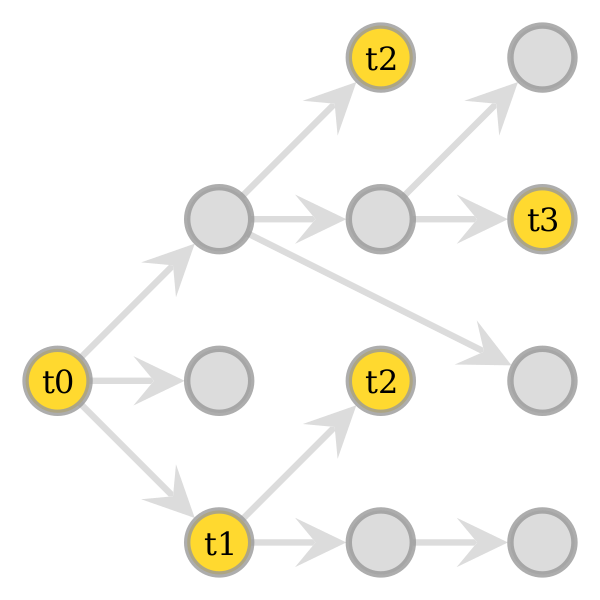

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fe064a78d68, at 0x7fe0650460b8>

In [55]:
# idx = np.random.permutation(len(infected))[:4]
# idx = list(idx) + [0]
# infected = [0, 1, 3, 4, 5, 6, 7, 9, 10]
idx = [0, 2, 3, 5, 7]
observed_nodes = np.array(infected)[idx]
obs_time = np.array(time)[idx]

dg = GraphView(g, directed=True)
s = default_setting(dg)
s['vertex_text'].set_value('')
s['vertex_fill_color'].set_value(COLOR_GREY)
for i, t in zip(observed_nodes, obs_time):
    s['vertex_text'][i] = 't{}'.format(t)
    s['vertex_fill_color'][i] = COLOR_YELLOW
graph_draw(dg, pos, **s, output='{}/observation.pdf'.format(fig_dirname))